In [54]:
#Importing necessary Libraries
import pandas as pd
import seaborn as sns
import numpy as np
import sklearn
import matplotlib.pyplot as plt
%matplotlib inline

In [55]:
# Importing car dataset
data = pd.read_csv('car_data.csv')

In [3]:
data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [4]:
# Checking shape of dataset
data.shape

(301, 9)

In [5]:
#Checking unique elements of every feature.
print(data['Seller_Type'].unique())
print(data['Transmission'].unique())
print(data['Owner'].unique())

['Dealer' 'Individual']
['Manual' 'Automatic']
[0 1 3]


In [6]:
#Checking missing values
data.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [7]:
data.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [8]:
# Dropping Name column and storing remaning data in new object
df = data.drop(['Car_Name'],axis =1)

In [9]:
df.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [10]:
#creating new feature
df['Current_Year']=2020

In [11]:
# creating new feature which describes how old car is.
df['Age'] = df['Current_Year'] - df['Year']

In [12]:
df.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Current_Year,Age
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2020,6
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2020,7
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2020,3
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2020,9
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2020,6


In [13]:
# Droppping some of the features from data which is not require anymore.
df.drop(['Year','Current_Year'],axis =1,inplace=True)

In [14]:
df.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,6
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,7
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,3
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,9
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,6


In [19]:
# Using Onehotencoding to convert catagorical variable into numerical variable.
df = pd.get_dummies(df,drop_first=True)

In [20]:
df.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,Age,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,6,0,1,0,1
1,4.75,9.54,43000,0,7,1,0,0,1
2,7.25,9.85,6900,0,3,0,1,0,1
3,2.85,4.15,5200,0,9,0,1,0,1
4,4.60,6.87,42450,0,6,1,0,0,1


In [21]:
# Finding Corelation between features
df.corr()

,Selling_Price,Present_Price,Kms_Driven,Owner,Age,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
Selling_Price,1.000000,0.878983,0.029187,-0.088344,-0.236141,0.552339,-0.540571,-0.550724,-0.367128
Present_Price,0.878983,1.000000,0.203647,0.008057,0.047584,0.473306,-0.465244,-0.512030,-0.348715
Kms_Driven,0.029187,0.203647,1.000000,0.089216,0.524342,0.172515,-0.172874,-0.101419,-0.162510
Owner,-0.088344,0.008057,0.089216,1.000000,0.182104,-0.053469,0.055687,0.124269,-0.050316
Age,-0.236141,0.047584,0.524342,0.182104,1.000000,-0.064315,0.059959,0.039896,-0.000394
Fuel_Type_Diesel,0.552339,0.473306,0.172515,-0.053469,-0.064315,1.000000,-0.979648,-0.350467,-0.098643
Fuel_Type_Petrol,-0.540571,-0.465244,-0.172874,0.055687,0.059959,-0.979648,1.000000,0.358321,0.091013
Seller_Type_Individual,-0.550724,-0.512030,-0.101419,0.124269,0.039896,-0.350467,0.358321,1.000000,0.063240
Transmission_Manual,-0.367128,-0.348715,-0.162510,-0.050316,-0.000394,-0.098643,0.091013,0.063240,1.000000


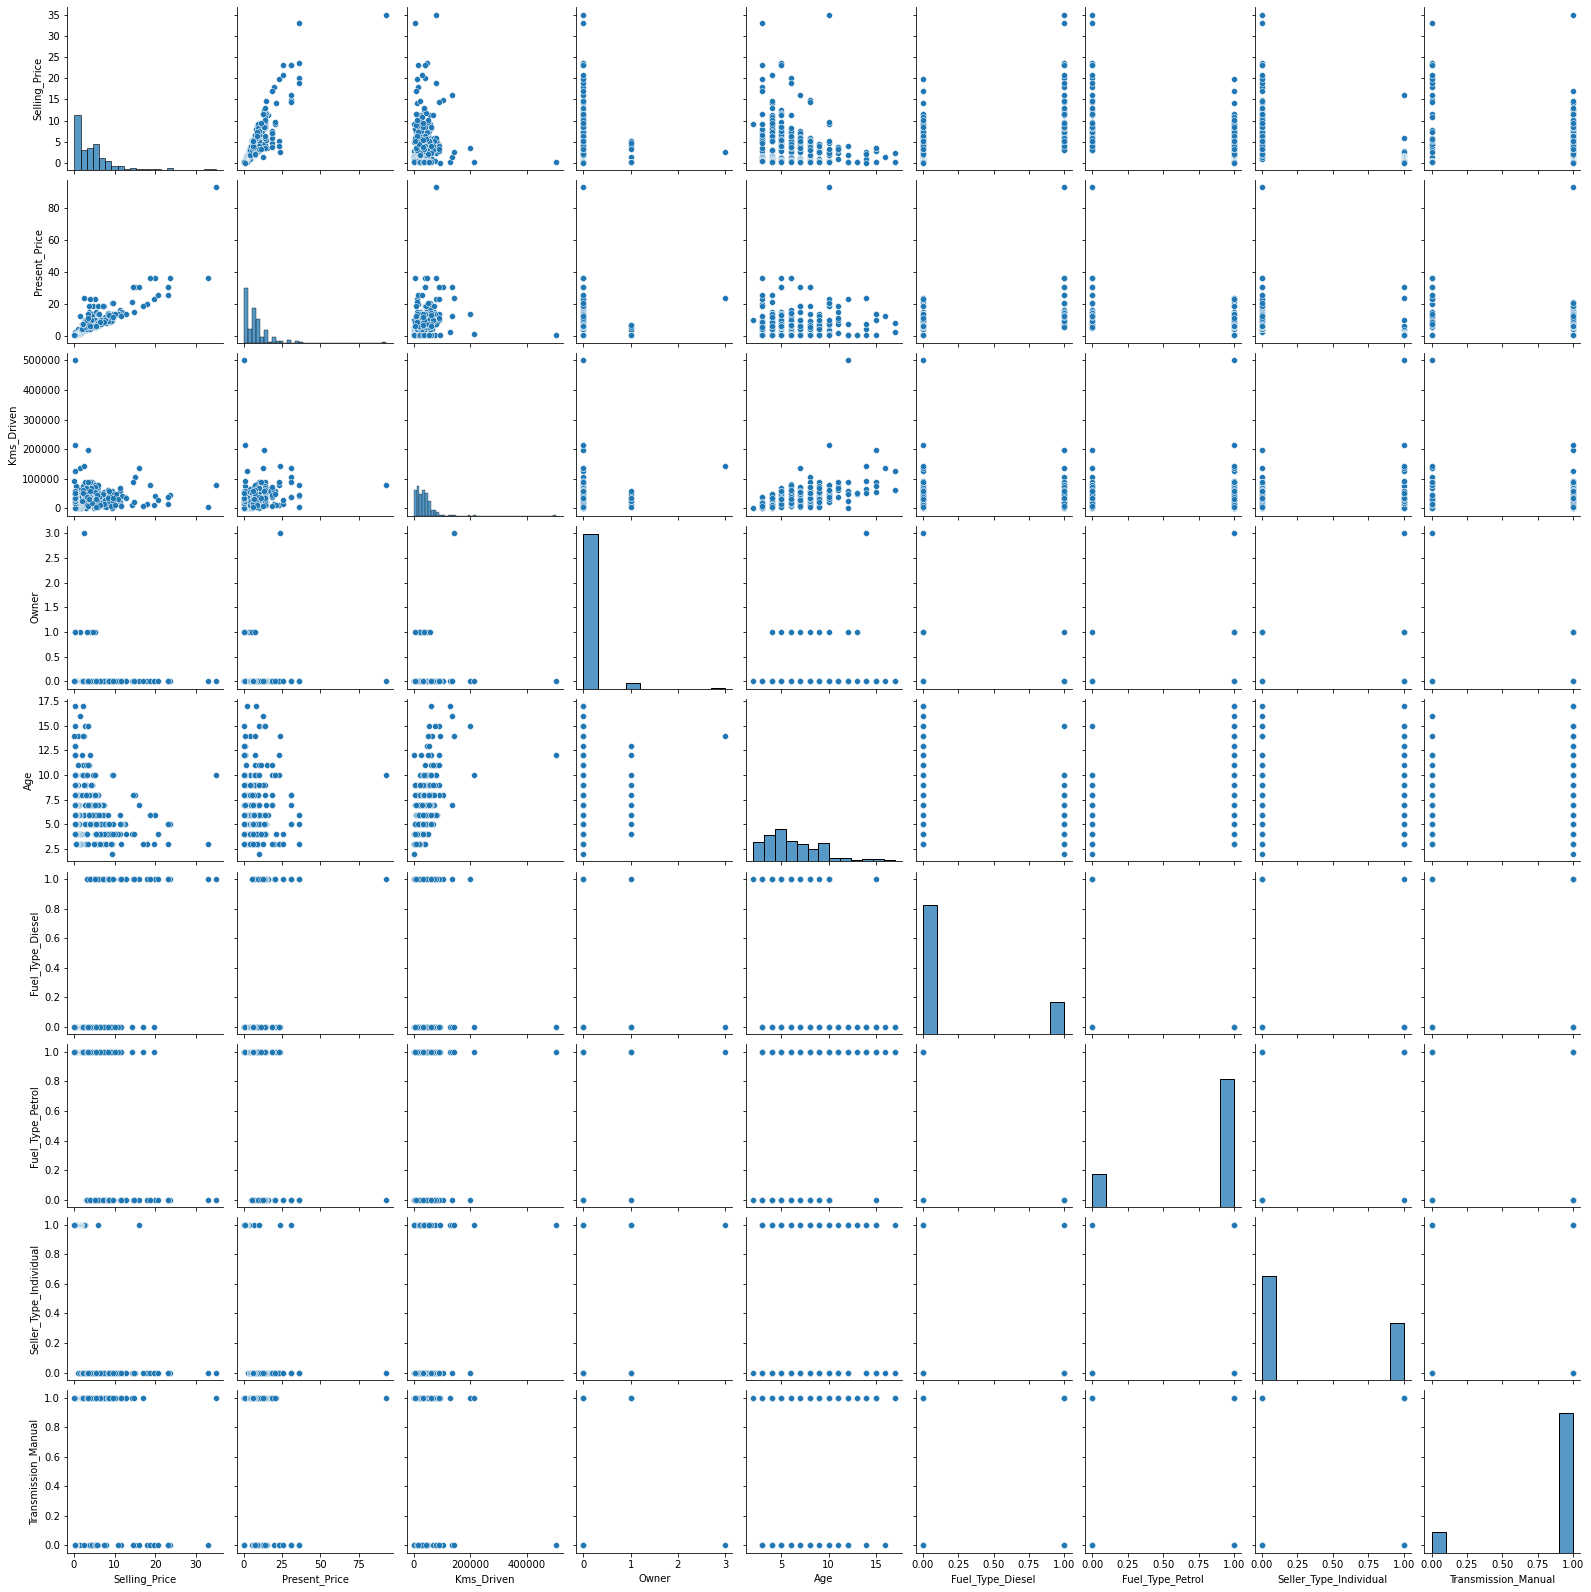

In [23]:
sns.pairplot(df)

<AxesSubplot:>

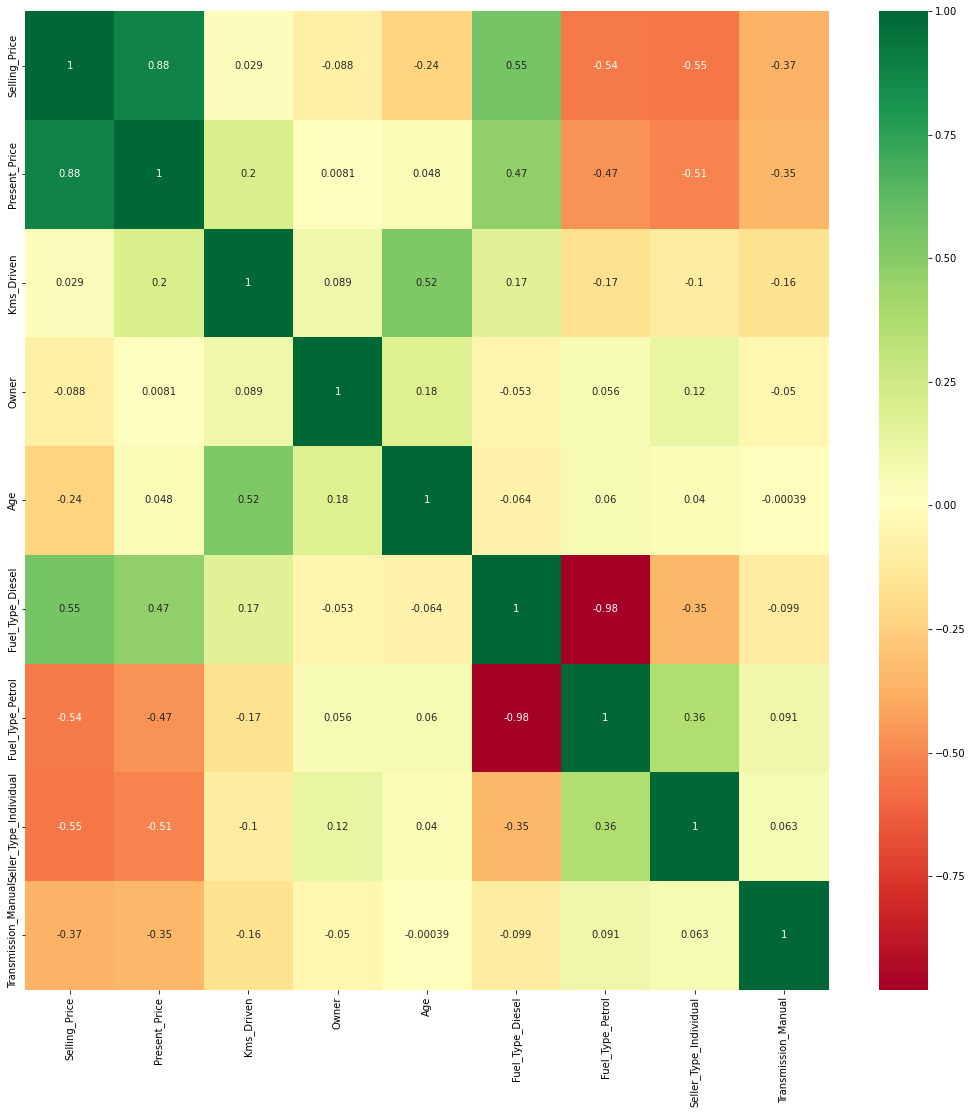

In [34]:
corrmat = df.corr()
top_corr_feature = corrmat.index
plt.figure(figsize=(18,18))
sns.heatmap(df[top_corr_feature].corr(),annot=True,cmap='RdYlGn')

In [35]:
df.columns

Index(['Selling_Price', 'Present_Price', 'Kms_Driven', 'Owner', 'Age',
       'Fuel_Type_Diesel', 'Fuel_Type_Petrol', 'Seller_Type_Individual',
       'Transmission_Manual'],
      dtype='object')

By Heat-Map we can conclued that Fuel_type_petrol and Fuel_type_diesel is highly negatively corelated and most of the data is correlated with each other.

In [58]:
#dividing the dataset into dependent and independent features.
x = df.iloc[:,1:]
y = df.iloc[:,0]

In [46]:
from sklearn.ensemble import ExtraTreesRegressor
regressor = ExtraTreesRegressor()
regressor.fit(x,y)

ExtraTreesRegressor()

In [61]:
print(regressor.feature_importances_)

[3.69653033e-01 3.91841334e-02 2.67961840e-04 8.06513790e-02
 2.27340742e-01 9.26128314e-03 1.29886429e-01 1.43755038e-01]


<AxesSubplot:>

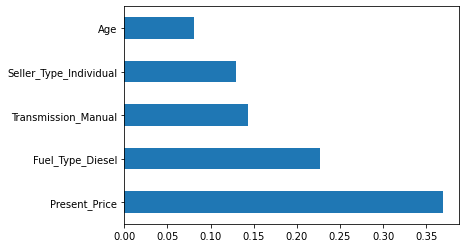

In [62]:
#showing some important features
feat_imp = pd.Series(regressor.feature_importances_,index=x.columns)
feat_imp.nlargest().plot(kind='barh')

In [94]:
#Splitting dataset into Training and Testing
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [95]:
x_train.shape

(240, 8)

In [96]:
# Provinding some hyperperameters to RandomSearchCV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [97]:
from sklearn.model_selection import RandomizedSearchCV

In [98]:
# Create the random grid(contains all above hyperparameters)
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [99]:
# importing RandomForest Regressor. We are gonna use it as estimator for RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()

In [100]:
rf_random = RandomizedSearchCV(estimator=rf,param_distributions=random_grid,scoring='neg_mean_squared_error',
                               n_iter=10,cv=5,verbose=2,random_state=0,n_jobs=1)

In [101]:
rf_random.fit(x_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=900; total time=   0.4s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=900; total time=   0.3s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=900; total time=   0.4s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=900; total time=   0.4s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=900; total time=   0.3s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=400; total time=   0.2s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=400; total time=   0.2s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_est

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=0, scoring='neg_mean_squared_error', verbose=2)

In [117]:
#Prediction the output from model
y_pred = rf_random.predict(x_test)
y_pred

array([ 6.94125398,  0.48924319,  4.75460942,  8.82680391, 14.50457276,
        5.25384457,  3.19011905,  0.45722323,  3.97637506,  4.83329028,
        2.82009038,  0.73759707,  4.8726093 ,  7.11247619,  7.6730121 ,
       14.75942381,  6.71708295,  4.01348682,  0.4629576 ,  1.5462869 ,
        3.1275744 ,  4.98591852,  5.27722599,  9.94274492,  0.18723207,
        0.74880764,  0.31132532,  0.693493  ,  0.47553571,  4.09075415,
        2.51712927,  5.89553929,  0.50356796,  7.27118532,  3.19813877,
        1.16712023,  5.83815473,  5.33150613,  0.23820321,  8.12374954,
        8.0758635 , 23.0010996 ,  4.92554683,  4.43915476,  5.73504762,
       10.9745475 ,  0.24701712,  0.81002963,  5.33096776,  6.6234015 ,
        6.82027012,  3.14066786,  5.31131736, 24.03967847,  1.18032585,
        1.13965782,  0.46099931,  2.50108075,  3.48668191,  2.56886147,
        3.84325102])

/opt/homebrew/Caskroom/miniforge/base/envs/carprice/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


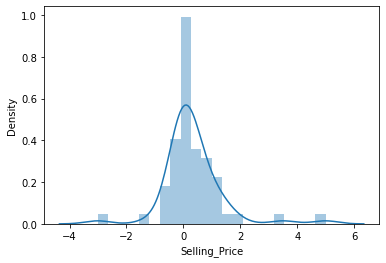

In [118]:
# Visualistion of prediction
sns.distplot(y_test-y_pred)
plt.show()

by above graph we can say that the difference between original value and predicted value is minimal. So, our model's prediction is very good

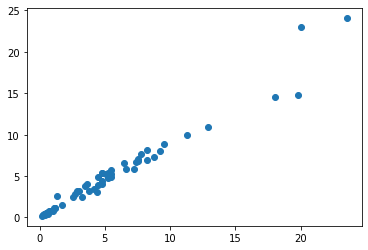

In [120]:
plt.scatter(y_test,y_pred)

By the above plot we can conclued that our model's prediction is very good.
Plot is linearly distributed.

In [123]:
# this will create a pickle file in your working directory.
import pickle
file = open('random_forest_regression_model.pkl','wb')
#dump info to that file
pickle.dump(rf_random,file)